# CMSE 201 Final Project Template

#### CMSE 201 Final Project
### &#9989; ADIT PARMAR
### &#9989; Section_002
#### &#9989; 12/01/2023

# Academic Integrity Statement

I, Adit Parmar, commit to ethically working towards my degree at Michigan state University. I pledge to uphold the principles of originality, citation, and fairness in all my academic pursuits. I believe that trust and integrity are fundamental to a meaningful educational journey.

# What Factors affect Heart Diseases and How?

## Background and Motivation

This project is to find out the relation of various factors to the health of a patient's heart. To do this I have chosen a dataset from kaggle that recorded these various factors ranging from the patients' age, maximum heart rate, cholesterol levels, etc,. I hope to find conclusive evidence that links the state of the patient's heart to some of these factors and find precautionary measures after figuring out how much these factors have that kind of effect.



## Methodology

Importing in some inbuilt tools that will prove useful:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import random 
import seaborn as sns

These are the columns(factors) in the csv file I chose from kaggle, these explanations were along with the file that tell us the different types of values stored in the file:

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type-

    0: Typical angina: chest pain related decrease blood supply to the heart
    
    1: Atypical angina: chest pain not related to heart
    
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    3: Asymptomatic: chest pain not showing signs of disease
    
    
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) ,anything above 130-140 is typically        cause for concern

5. chol - serum cholestoral in mg/dl

    serum = LDL + HDL + .2 * triglycerides
    
    above 200 is cause for concern
    
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes
   
7. restecg - resting electrocardiographic results
    
    0: Nothing to note
    
    1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    
    2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber
    
8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest. Looks at stress of heart during excercise unhealthy    heart will stress more

11. slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    
    1: Flatsloping: minimal change (typical healthy heart)
    
    2: Downslopins: signs of unhealthy heart
    
12. ca - number of major vessels (0-3) colored by flourosopy

    colored vessel means the doctor can see the blood passing through
    
    the more blood movement the better (no clots)
    
13. thal - thalium stress result

    1,3: normal
    
    6: fixed defect: used to be defect but ok now
    
    7: reversable defect: no proper blood movement when excercising
    
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
import pandas as pd
heart = pd.read_csv("heart_disease.csv")  #loading in the csv file from Kaggle
heart.head()    #we can see the top 5 rows and the different columns of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
nan_values = heart.isna().sum()  #searching for number of NaN values in the columns.
nan_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From what I have seen there seems to be no reason to clean the dataset since the dataset seems to already be clean itself. There are no NaN values or empty columns in the dataset. Even some of the categorial variables have been stored as integers which will make it easier in the future to plot.

Now we can start to play around with the data and and find different scenarios and cases that might lead us to some observations.

# 1. Age/Gender of Patients in the sample-

Let's start with the simpler variables and find the Age and Gender counts and distributions of the sample of patients.

In [4]:
print("The total number of patients are", len(heart["age"]))

The total number of patients are 303


In [5]:
mean_value1=np.mean(heart["age"])
median_value1=np.median(heart["age"]),
standard_deviation1=np.std(heart["age"])
standard_deviation1,mean_value1,median_value1

(9.067101638577872, 54.366336633663366, (55.0,))

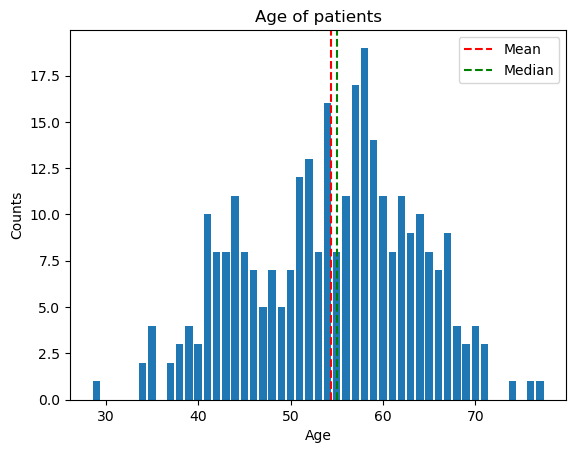

In [6]:
age_count = heart["age"].value_counts()

# Plot a bar chart with counts on the y-axis
plt.bar(age_count.index, age_count.values)
plt.title('Age of patients')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.axvline(x=mean_value1, color='r', linestyle='--', label='Mean')
plt.axvline(x=median_value1, color='g', linestyle='--', label='Median')
plt.legend()
plt.show()

From the above information we can infer that majority of the patients are between the ages 45 and 65. The mean age is 54.36 and the median age is 55 with accordance to the sample .

/var/folders/qz/ffq8fddn7slf86scfc9p2t0w0000gn/T/ipykernel_82111/1918218054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets[i]="Yes"
/var/folders/qz/ffq8fddn7slf86scfc9p2t0w0000gn/T/ipykernel_82111/1918218054.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex[i]="Male"


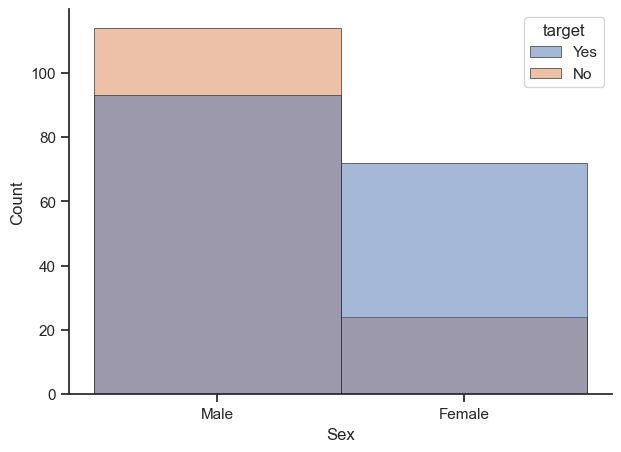

In [273]:
i=0
targets=heart["target"]
for i in range(len(heart["target"])):       #Turning the target int-column into a categorical-column
    if  targets[i]==1:
        targets[i]="Yes"
    elif targets[i]==0:
        targets[i]="No"

heart["target"]=targets

i=0
sex=heart["sex"]
for i in range(len(heart["sex"])):          #Turning the sex int-column into a categorical-column
    if  sex[i]==1:
        sex[i]="Male"
    elif sex[i]==0:
        sex[i]="Female"
        
        
heart["sex"]=sex

sns.set_theme(style="ticks")                #Using seaborn to plot a histogram 

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    heart,
    x="sex", hue="target",
    edgecolor=".2",
    linewidth=0.5,
)

plt.xlabel("Sex")
ax.set_xticks([0, 1])

There are more Male patients than female patients.

In [274]:
i=0
j=0
k=0
temp1=heart["sex"]
for i in range(len(heart["sex"])):
    if temp[i]=="Male":
        j=j+1
    else:
        k=k+1
            
j,k          #number of male and female patients respectively

(207, 96)

In [275]:
i=0
m=0
n=0
temp1=heart["sex"]
temp2=heart["target"]
for i in range(len(heart["sex"])):
    if temp[i]=="Male" and temp2[i]=="Yes":
        m=m+1
    elif temp[i]=="Female" and temp2[i]=="Yes":
        n=n+1
m,n                #number of male and female patients with heart disease respectively

(93, 72)

In [276]:
percentage1=m/j
percentage2=n/k  
percentage1,percentage2

(0.4492753623188406, 0.75)

# 2. Correlation between Variables and Heart Disease

In [4]:
## This graph was made with the help of kaggle- https://www.kaggle.com/code/faressayah/practical-guide-to-6-classification-algorithms?scriptVersionId=119623520
##I wanted to include this graph since it looked interesting and very easy to understand

import hvplot.pandas

hearts= pd.read_csv("heart_disease.csv") 
hearts.drop('target', axis=1).corrwith(hearts.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

# 3. Types of Chest Pains that Patients have-

/var/folders/qz/ffq8fddn7slf86scfc9p2t0w0000gn/T/ipykernel_82111/1963512563.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp[i]="Asymptomatic"


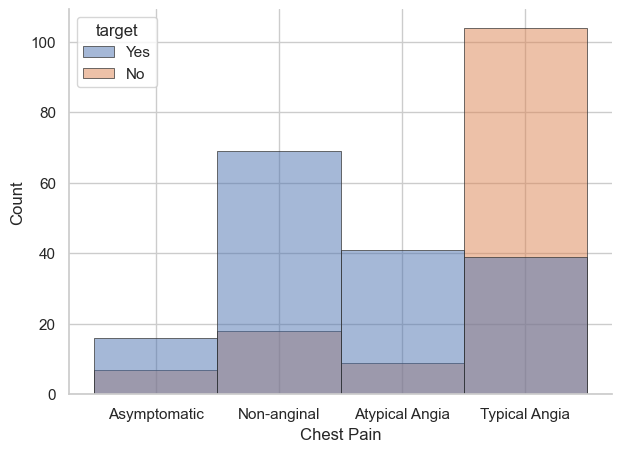

In [278]:
i=0
cp=heart["cp"]
for i in range(len(heart["cp"])):        #Turning the cp int-column into a categorical-column
    if cp[i]==0:
        cp[i]="Typical Angia"
    elif cp[i]==1:
        cp[i]="Atypical Angia"
    elif cp[i]==2:
        cp[i]="Non-anginal"
    elif cp[i]==3:
        cp[i]="Asymptomatic"

heart["cp"]=cp

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(               #Using seaborn for creating a histogram to find counts of different kinds of chest pains 
    heart,
    x="cp", hue="target",
    edgecolor=".2",
    linewidth=0.5
)

plt.xlabel("Chest Pain")
ax.set_xticks([0, 1, 2, 3])

In [279]:
i=0
a=0
b=0
c=0
d=0
cp_temp=heart["cp"]
for i in range(len(heart["cp"])):
    if cp_temp[i]=="Typical Angia":
        a=a+1
    elif cp_temp[i]=="Atypical Angia":
        b=b+1
    elif cp_temp[i]=="Non-anginal":
        c=c+1
    elif cp_temp[i]=="Asymptomatic":
        d=d+1
a,b,c,d

(143, 50, 87, 23)

In [280]:
i=0
a1=0
b1=0
c1=0
d1=0
cp_temp=heart["cp"]
for i in range(len(heart["cp"])):
    if cp_temp[i]=="Typical Angia" and temp2[i]=="Yes":
        a1=a1+1
    elif cp_temp[i]=="Atypical Angia" and temp2[i]=="Yes":
        b1=b1+1
    elif cp_temp[i]=="Non-anginal" and temp2[i]=="Yes":
        c1=c1+1
    elif cp_temp[i]=="Asymptomatic" and temp2[i]=="Yes":
        d1=d1+1
a1,b1,c1,d1

(39, 41, 69, 16)

In [281]:
a1/a, b1/b, c1/c, d1/d

(0.2727272727272727, 0.82, 0.7931034482758621, 0.6956521739130435)

Typical Angia-27%

Atypical Angia-82%

Non-Anginal-79%

Asymptomatic- 69%

Typical Angia- It is often described as a squeezing or pressure like discomfort in the chest. It may be triggered by exertion or stress.

Atypical Angia- This chest pain doesn't fit all the classic criteria for typical angina but may still be related to heart issues. The pain may be sharp, burning, or feel like indigestion. It might not be triggered by physical exertion.

Non-Anginal- This pain may originate from the muscles, bones, nerves, or other structures in the chest. It can be related to issues like muscle strain, inflammation, or digestive problems.

Asymptomatic- There are no noticeable symptoms or pain. Individuals may have heart disease or related issues without experiencing chest pain. Diagnosis may be based on other indicators like abnormal test results or imaging findings.

The most common chest pain among the patients is a Typical Angina.
Meanwhile Non-Anginal pains leads most to heart disease followed by Typical chest Pains.

Text(0.5, 0, 'Chest Pain')

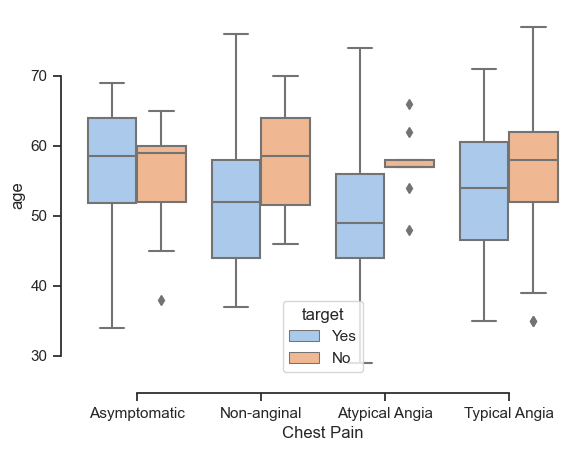

In [282]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="cp", y="age",            #Using seaborn for creating a boxplot of Age Vs chest pain
            hue="target",
            data=heart)
sns.despine(offset=10, trim=True)
plt.xlabel("Chest Pain")

Atypical Angia has an extremly high chance of leading to heart disease and is mainly present between ages 45 and 55. This also compliments our results from the first histogram of Age counts which lead to the conclusion that most of the heart disease patients are between the ages 45 and 65.


# 4. Correlation between Max Heart Rate and Age-

Text(45.36, 0.5, 'Max Heart Rate')

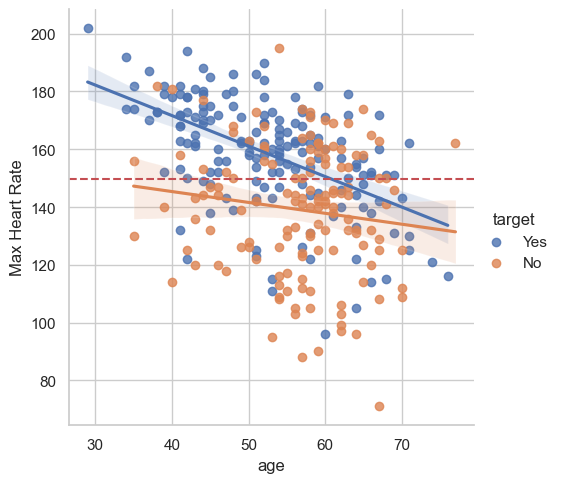

In [283]:
sns.set_theme(style="whitegrid")                      #Using Seaborn to plot line plots of Max Heart Rate Vs Age
g = sns.lmplot(
    data=heart,
    x="age", y="thalach", hue="target",
    height=5
)
plt.axhline(y=np.mean(heart["thalach"]), color='r', linestyle='--', label='Mean')
plt.ylabel("Max Heart Rate")

Here the mean Max Heart Rate is around 150. The genral trend of the plot is that of 2 inversely proportional variables. Patients with higher Max Heart Rate generally have heart disease.

# 5. How is the slope of the ST segment after peak exercise related to Heart Disease

/var/folders/qz/ffq8fddn7slf86scfc9p2t0w0000gn/T/ipykernel_82111/2625356492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope[i]="Up-sloping"


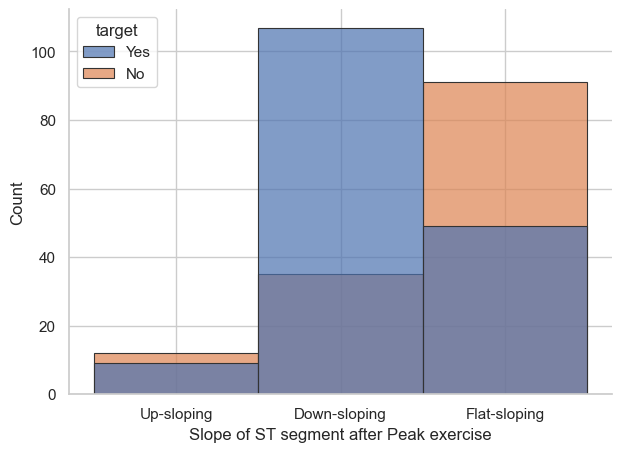

In [284]:
i=0
slope=heart["slope"]
for i in range(len(heart["slope"])):
    if  slope[i]==0:
        slope[i]="Up-sloping"
    elif slope[i]==1:
        slope[i]="Flat-sloping"
    elif slope[i]==2:
        slope[i]="Down-sloping"

heart["slope"]=slope

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(                   #Using seaborn to plot a histogram for slope of ST segment after Peak exercise
    heart,
    x="slope", hue="target",
    edgecolor=".2",
    linewidth=0.8,
    alpha=0.7
)

plt.xlabel("Slope of ST segment after Peak exercise")
ax.set_xticks([0, 1, 2])

In simple terms, the ST segment is a portion of an electrocardiogram (ECG or EKG) that represents the period between the end of the S wave and the beginning of the T wave. The ST segment is an important component of the ECG as it provides information about the electrical activity of the heart.

Normally, the ST segment is a flat, isoelectric line that connects the S wave (which represents the depolarization of the ventricles of the Heart) to the T wave (which represents the repolarization of the ventricles of the Heart). However, changes in the ST segment can indicate various cardiac conditions.

Elevations or depressions in the ST segment may be indicative of heart-related issues

# 6. Correlation between Heart Disease and Oldpeak (ST depression induced by exercise relative to rest)

Text(0.5, 0, 'ST depression induced by exercise relative to rest')

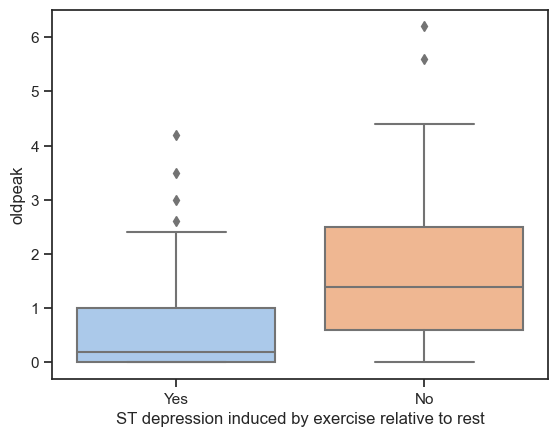

In [285]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(y="oldpeak",x="target",    #Using seaborn to plot a lineplot for ST depression induced by exercise relative to rest,
            data=heart)

plt.xlabel("ST depression induced by exercise relative to rest")

# 7. Correlation between Thalium Stress Levels and Heart Disease

/var/folders/qz/ffq8fddn7slf86scfc9p2t0w0000gn/T/ipykernel_82111/2709183857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thal[i]="Normal"


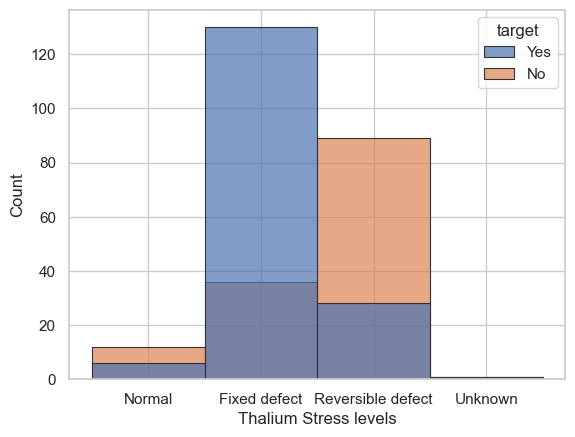

In [286]:
i=0
thal=heart["thal"]
for i in range(len(heart["thal"])):
    if thal[i]==0:
        thal[i]="Unknown"
    elif thal[i]==1:
        thal[i]="Normal"
    elif thal[i]==2:
        thal[i]="Fixed defect"
    elif thal[i]==3:
        thal[i]="Reversible defect"


sns.set_theme(style="whitegrid")

sns.histplot(                   #Using seaborn to plot a histogram for Thalium Stress levels
    heart,
    x="thal", hue="target",
    edgecolor=".2",
    linewidth=0.8,
    alpha=0.7
)

plt.xlabel("Thalium Stress levels")
ax.set_xticks([1, 2, 3, 4])

Thalium stress testing is a medical procedure used to evaluate how well the heart is functioning, especially during physical exertion. It combines the use of a radioactive substance (thallium or technetium) and a stress test to create images of the heart.

# 8. Correlation between Exercise induced Angia and Heart Disease

/var/folders/qz/ffq8fddn7slf86scfc9p2t0w0000gn/T/ipykernel_82111/1503759087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exang[i]="No"


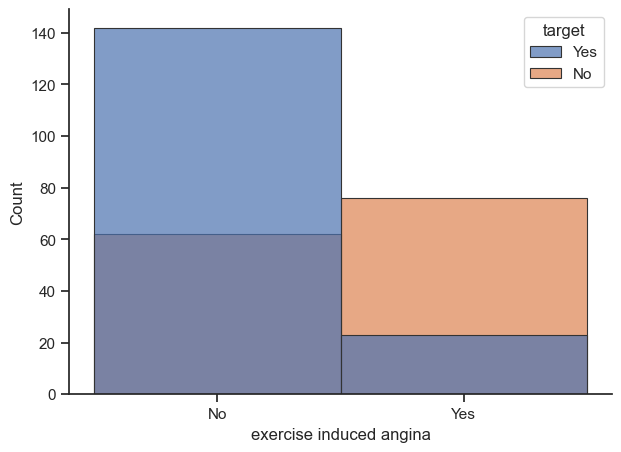

In [287]:
i=0
exang=heart["exang"]
for i in range(len(heart["exang"])):
    if  exang[i]==1:
        exang[i]="Yes"
    elif exang[i]==0:
        exang[i]="No"

heart["exang"]=exang

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(                      #Using seaborn to plot a histogram for Exercise induced Angia
    heart,
    x="exang", hue="target",
    edgecolor=".2",
    linewidth=0.8,
    alpha=0.7
)

plt.xlabel("exercise induced angina")
ax.set_xticks([0, 1])

Exercise-induced angina, also known as exertional angina, is a type of chest pain or discomfort that occurs during physical activity or exertion. It is a symptom commonly associated with coronary artery disease (CAD), a condition where the blood vessels (coronary arteries) supplying the heart muscle with oxygen and nutrients become narrowed or blocked.

# 9. Correlation between number of visible coronary arteries and Heart Disease

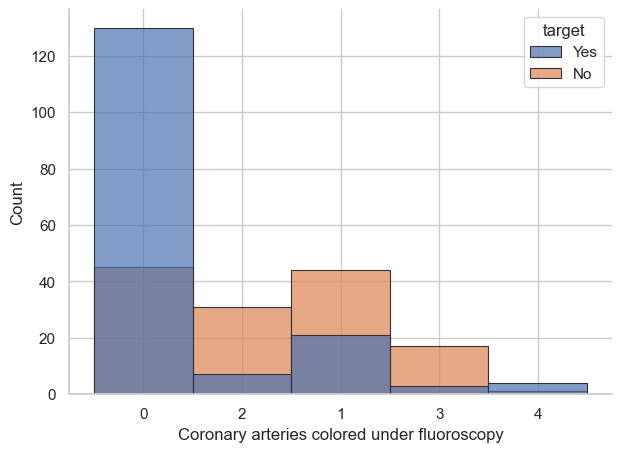

In [294]:
i=0
ca=heart["ca"]
for i in range(len(heart["ca"])):
    if ca[i]==0:
        ca[i]="0"
    elif ca[i]==1:
        ca[i]="1"
    elif ca[i]==2:
        ca[i]="2"
    elif ca[i]==3:
        ca[i]="3"
    if ca[i]==4:
        ca[i]="4"

heart["ca"]=ca

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(                         #Using seaborn to plot a histogram for number of coronary arteries
    heart,
    x="ca", hue="target",
    edgecolor=".2",
    linewidth=0.8,
    alpha=0.7
)

plt.xlabel("Coronary arteries colored under fluoroscopy")
ax.set_xticks([0, 1, 2, 3, 4])

#  10. Other Factors with lesser correlation to Heart Disease

Text(0, 0.5, 'Resting BPS')

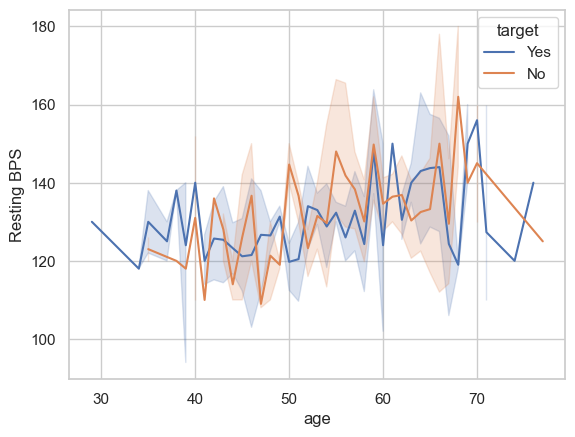

In [289]:
sns.set_theme(style="whitegrid")

sns.lineplot(x="age", y="trestbps",
             hue="target",
             data=heart)
plt.ylabel("Resting BPS")

/var/folders/qz/ffq8fddn7slf86scfc9p2t0w0000gn/T/ipykernel_82111/1101907515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fbs[i]="True"


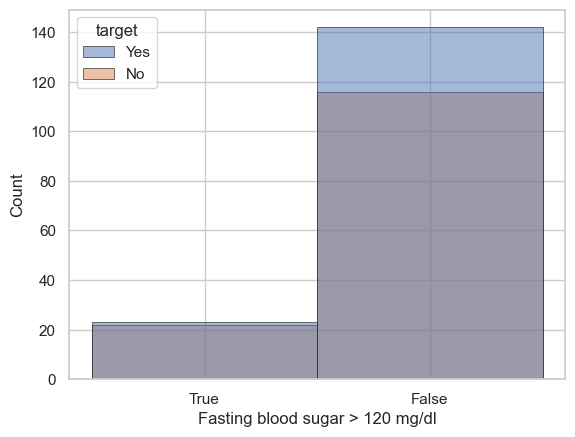

In [290]:
i=0
fbs=heart["fbs"]
for i in range(len(heart["fbs"])):
    if  fbs[i]==1:
        fbs[i]="True"
    elif fbs[i]==0:
        fbs[i]="False"

heart["fbs"]=fbs

fbs_count = heart["fbs"].value_counts()

sns.set_theme(style="whitegrid")
sns.histplot(                         #Using seaborn to plot a histogram for Resting Blood Pressure
    heart,
    x="fbs", hue="target",
    edgecolor=".2",
    linewidth=0.5,
)

plt.xlabel("Fasting blood sugar > 120 mg/dl")   #'>126' mg/dL signals diabetes
ax.set_xticks([0, 1])

/var/folders/qz/ffq8fddn7slf86scfc9p2t0w0000gn/T/ipykernel_82111/3152687082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restecg[i]="1"


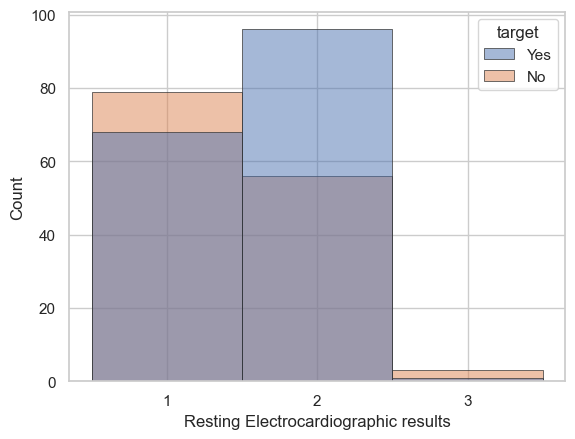

In [291]:
i=0
restecg=heart["restecg"]
for i in range(len(heart["restecg"])):
    if restecg[i]==0:
        restecg[i]="1"
    elif restecg[i]==1:
        restecg[i]="2"
    elif restecg[i]==2:
        restecg[i]="3"

heart["restecg"]=restecg


sns.set_theme(style="whitegrid")
sns.histplot(                          #Using seaborn to plot a histogram for ECG results
    heart, 
    x="restecg", hue="target",
    edgecolor=".2",
    linewidth=0.5,
)

plt.xlabel("Resting Electrocardiographic results")
ax.set_xticks([0, 1, 2])

1: Nothing to note
    
2: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    
3: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber
    

Text(0, 0.5, 'Cholesterol')

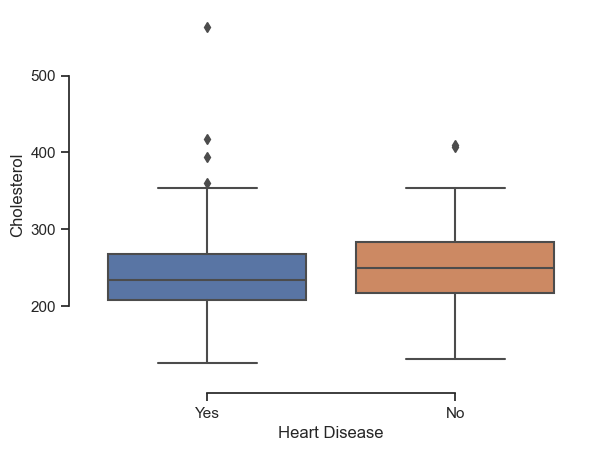

In [292]:
sns.set_theme(style="ticks")

sns.boxplot(x="target", y="chol",          #Using seaborn to plot a boxplot for cholesterol vs Target
            data=heart)
sns.despine(offset=10, trim=True)
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")

## Results

1.The total number of patients are 303. 

Age-The mean age is 54.366336633663366, the median age 55.0, the standard deviation is 9.067101638577872. From the information we can infer that majority of the patients are between the ages 45 and 65. 

Sex-The number of male patients and female patients are 207 and 96 respectively. percentage of male and female patients with heart disease in the sample are 0.4492753623188406 and 0.75 respectively. Even though the number of male patients with heart disease are more than female patients, statistically the percentage of those patients that have heart disease are more from the females by a significant margin.
 
 
2.Some of the most important factors that are correlated to heart disease are- Types of Chest Pain, Exercise induced Angia, Max Heart Rate, Thalium stress levels and ST segment depression induced by exercise relative to rest. The factors which do not seem to have much a bearing on heart disease are factors such as - fasting blood sugar levels, resting ecg and cholesterol.

3.Chest Pains-
Typical Angia-27% of the people with this type of chest pain had heart disease

Atypical Angia-82% of the people with this type of chest pain had heart disease

Non-Anginal-79% of the people with this type of chest pain had heart disease

Asymptomatic- 69% of the people with this type of chest pain had heart disease

People with Atypical Angia,Non-Anginal and Asymptimatic pains have more chances of getting heart disease than those with Typical Angia, which is very shocking since Non-Angial pain is usually said to be unrelated to heart problems while Typical Angial pains are related to heart problems.

Atypical Angia has an extremly high chance of leading to heart disease and is mainly present between ages 45 and 55. 

4.In this sample the mean Max Heart Rate is around 150. As The age of the patients increase so does the Max Heart rate. Patients with higher Max Heart Rate generally have heart disease. Patients who have a heart rate of more than 150 are in the danger zone of having heart disease.

5.Patients with a down sloping ST segment run risk of having heart disease by a huge margin.

6.Exercise-induced downsloping ST-segment depression is said to be a common manifestation of severe ischemia.Ischemia is a medical term that refers to an inadequate blood supply to an organ or a part of the body, resulting in reduced oxygen and nutrient delivery to the affected tissue. The lower the value the higher the risk of having Heart disease as we could see from the boxplot against "target".

7.Patients with a fixed defect had the highest chances of having heart disease. If a region consistently shows reduced tracer uptake both at rest and during stress imaging to determine the baseline blood flow towards the heart, it may indicate scar tissue from a past heart attack or chronic reduction in blood flow, potentially due to coronary artery disease.

Reversible defect- A region of the heart that shows reduced tracer uptake during stress imaging but improves or becomes normal at rest imaging may indicate ischemia, suggesting that blood flow to that area is compromised during stress but not at rest.

There were also 2 unknown entries in the dataset with thalium stress levels entered 0. It is not described what this represents, so it might be a mistake made creating the data set.

8.Patients without exercise induced Angina have higher chances of having heart disease.
This was surprising since it technically should be the opposite considering the general trend. It means that exercise induced angina is not as common of a symptom of heart disease.

9.The number of coronary arteries (scale->0-4) colored by flouroscopy (usually 0). The patients having a 0 on the scale have a high chance of having heart disease. The more visible coronary arteries the better the flow of blood and lesser chances of blood clots and heart diseases.

10.Factors such as-fasting Blood sugar, cholesterol and Resting Blood Pressure do not have much of an effect on Heart disease.

For most of the patients the fasting blood sugar was below 120mg/dl, yet they still had an equal chance of having heart disease.

Even while checking cholesterol levels there did not seem to be much of a difference between those patients having heart disease and those who did not.

## Discussion and Conclusion

If this sample is truly indicative of the genral population of the United States, we can conclude that Patients between the ages 45-65, with Atypical Anginal, Non-Anginal, Asymptomatic Chest Pains have a High probability of Heart Disease. 
Their Max Heart Rate will most probably be higher than 150. Their slope of the ST segment will be a decreasing one. 

They may also have exercise induced angina. Also the lower the ST depression induced by exercise relative to rest the higher the chance of the patient having heart disease.

If they also have fixed Perfusion Defect(indicative of past heart attacks or reduced blood flow) it will also raise their chances of Heart disease. Furtermore the lower the number of visible coronary arteries under fluoroscopy the lower the blood flow and higher the chance for Heart disease, the patient has a high chance of having only 1 on the visibility scale.

There are a few obastacles that I had while completing this project. Even though I chose this data set from kaggle there were a few columns I had no idea about so for refrence I had to learn all new things about Thallium stress levels, Agina, ST segment,etc. 
I also had a little help from Kaggle especially for the first plot, but the other content heavily relied on "hvplot.pandas". I do not understand much about this so I could not learn further and I think I missed out on a few things because of this. If i could change something the next time I have to do a project like this I would like to learn a bit more about hvplots. But I was able to do just fine using seaborn.

Hope you enjoyed reading through this project. Thank you.

### References

The data set was derived and modeled from Kaggle-

https://www.kaggle.com/datasets/yasserh/heart-disease-dataset

https://www.kaggle.com/code/faressayah/practical-guide-to-6-classification-algorithms?scriptVersionId=119623520

Help for Seaborn Plots-

https://seaborn.pydata.org/examples/index.html